# Women's E-Commerce Clothing Reviews Data Exploration
## by Lama AlDaej

> This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”. This dataset was downloaded from [nicapotato - Kaggle](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews/version/1)

In [32]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [33]:
# read the dataset and load it in the 'df' dataframe variable
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0)

# print 5 random rows
df.sample(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
3551,1077,28,Liked but too big,"Really liked this dress, but it ran too big fo...",3,1,1,General,Dresses,Dresses
22265,1077,40,This dress is all polyester! beware!,I got fooled by this dress's description. it's...,1,0,12,General Petite,Dresses,Dresses
4421,933,38,Wanted to love this...,I should have listened to the previous review ...,1,0,0,General Petite,Tops,Sweaters
14714,927,47,Nice tank for summer!,I purchased this tank in white. the material i...,4,1,3,General Petite,Tops,Sweaters
14959,867,45,Note the neoprene,Now i would've been scared off by the fabrics ...,5,1,4,General Petite,Tops,Knits


## Data Cleaning

In [34]:
# check how many rows in the dataset
df.shape[0]

23486

In [35]:
# count how many missing values in each column of the dataset
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [36]:
# The 'Title' column has 3810 missing value; however, this column in not needed in my analysis.
# Drop the 'Title' column
df.drop(df.columns[[2]], axis=1, inplace=True)

# count how many missing values in each column of the dataset
df.isnull().sum()

Clothing ID                  0
Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [37]:
# The 'Review Text' column has 845 missing values. 
# However, I believe these missing values could have some insights; therefore, I will replace them with 'NO TEXT' value.
df = df.fillna({'Review Text':'NO TEXT'})

# count how many missing values in each column of the dataset
df.isnull().sum()

Clothing ID                 0
Age                         0
Review Text                 0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name              14
Department Name            14
Class Name                 14
dtype: int64

In [38]:
# To avoid bias, I will delete the rows that have missing values in division, department, or class columns 
#   since they are some of the interesting features that I want to explore

# drop all the missing values
df = df.dropna()

# count how many missing values in each column of the dataset
df.isnull().sum()

Clothing ID                0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [39]:
# check how many rows in the dataset after deleting the missing rows
df.shape[0]

23472

In [40]:
# check the data type of each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23472 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23472 non-null  int64 
 1   Age                      23472 non-null  int64 
 2   Review Text              23472 non-null  object
 3   Rating                   23472 non-null  int64 
 4   Recommended IND          23472 non-null  int64 
 5   Positive Feedback Count  23472 non-null  int64 
 6   Division Name            23472 non-null  object
 7   Department Name          23472 non-null  object
 8   Class Name               23472 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.8+ MB


In [41]:
# The Clothing ID column should be string using map(str) function
df['Clothing ID']= df['Clothing ID'].map(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23472 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23472 non-null  object
 1   Age                      23472 non-null  int64 
 2   Review Text              23472 non-null  object
 3   Rating                   23472 non-null  int64 
 4   Recommended IND          23472 non-null  int64 
 5   Positive Feedback Count  23472 non-null  int64 
 6   Division Name            23472 non-null  object
 7   Department Name          23472 non-null  object
 8   Class Name               23472 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.8+ MB


In [42]:
# Check if there is an invalid age (=< 0)
df.Age.min()

18

In [43]:
# Check the rating values
df.Rating.value_counts()

5    13117
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

### The structure of the dataset after cleaning

> This clean dataset includes 23472 non-null rows and 9 feature variables. Each row corresponds to a customer review, and includes the variables:
> 1. Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
> 2. Age: Positive Integer variable of the reviewers age.
> 3. Review Text: String variable for the review body.
> 4. Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
> 5. Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
> 6. Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
> 7. Division Name: Categorical name of the product high level division.
> 8. Department Name: Categorical name of the product department name.
> 9. Class Name: Categorical name of the product class name.



### The main questions are:

> 1. Does the E-commerce website satisfy its customers?
> 2. What are the best clothing class, department, and division that have the highest rating reviews?
> 3. What are the differences in the most frequent words of the best and worst rated reviews?
> 4. What is the most customers' age range of the company, and how helpful are their reviews?
> 5. How helpful are the reviews for the other customers?

## Customer Satisfaction Analysis

> This section includes the analysis of customer satisfaction of the E-Commerce website by analyzing the 'Rating' and 'Recommended IND' columns.

### Rating Count

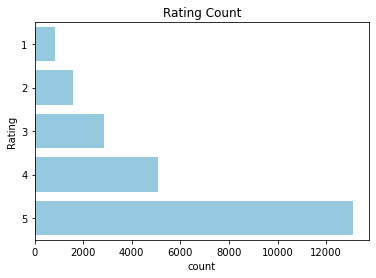

In [44]:
# Plot the Rating on a Horizontal bar chart

# The `color_palette()` returns the the current / default palette as a list of RGB tuples. 
# Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. 
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]
rating_plt = sb.countplot(data = df, y = 'Rating', color= 'skyblue');
rating_plt.set_title('Rating Count');

#### Observation:
> Most customers rate products with 5.

### Products Recommendation

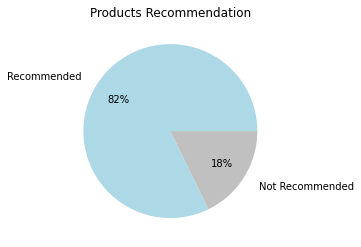

In [45]:
data = df['Recommended IND'].value_counts()
labels = ['Recommended' , 'Not Recommended']
colors = ['lightblue','silver']
# Show percentage position reference: https://stackoverflow.com/questions/21572870/matplotlib-percent-label-position-in-pie-chart
plt.pie(data, labels=labels, colors=colors, autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.2)
plt.title('Products Recommendation')
plt.show()

#### Observation:
> 82% customers recommended the products.

### Section's Insights:
> The company seems to satisfy their customers since they tend to write 5 rating reviews and 82% of them recommended the products.

## Best Rated Analysis

> This section includes the analysis of the best rated clothing class, department, and division of the E-Commerce website by analyzing the 'Rating', 'Class Name', 'Department Name', and 'Division Name' columns.

### Clothing Division vs Rating

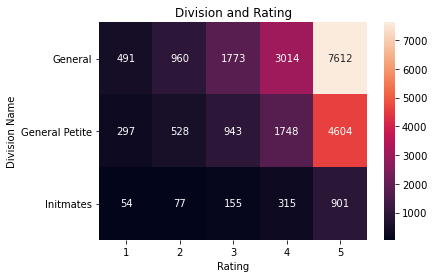

In [46]:
# Use group_by() and size() to get the number of divisions and each combination of the two variable levels as a pandas Series
dv_counts = df.groupby(['Division Name', 'Rating']).size()

# Use Series.reset_index() to convert a series into a dataframe object
dv_counts = dv_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have divisions class on rows
dv_counts = dv_counts.pivot(index = 'Division Name', columns = 'Rating', values = 'count')

# Set the fmt to '.0f' for divisions that have no rating counts, in order to account for NaNs.
dv_plt = sb.heatmap(dv_counts, annot = True, fmt = '.0f');

# Change the y-axis labels rotation to make them readable
dv_plt.set_yticklabels(dv_plt.get_yticklabels(),rotation = 0);

# Set Title
dv_plt.set_title('Division and Rating');

#### Observation:
> The best clothing division that had the highest rating is 'General'

### Clothing Department vs Rating

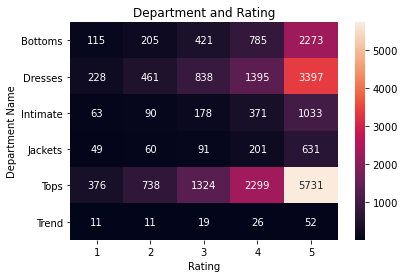

In [47]:
# Use group_by() and size() to get the number of departments and each combination of the two variable levels as a pandas Series
dp_counts = df.groupby(['Department Name', 'Rating']).size()

# Use Series.reset_index() to convert a series into a dataframe object
dp_counts = dp_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have departments on rows
dp_counts = dp_counts.pivot(index = 'Department Name', columns = 'Rating', values = 'count')

# Set the fmt to '.0f' for departments that have no rating counts, in order to account for NaNs.
dp_plt = sb.heatmap(dp_counts, annot = True, fmt = '.0f');

# Change the y-axis labels rotation to make them readable
dp_plt.set_yticklabels(dp_plt.get_yticklabels(),rotation = 0);

# Set Title
dp_plt.set_title('Department and Rating');

#### Observation:
> The best clothing department that had the highest rating is 'Tops'

### Clothing Class vs Rating

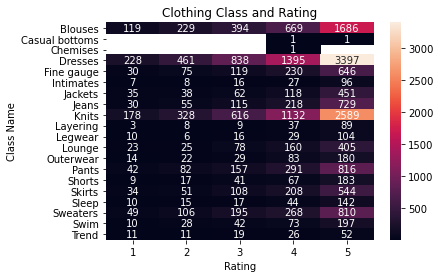

In [48]:
# Use group_by() and size() to get the number of classes and each combination of the two variable levels as a pandas Series
class_counts = df.groupby(['Class Name', 'Rating']).size()

# Use Series.reset_index() to convert a series into a dataframe object
class_counts = class_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have classes on rows
class_counts = class_counts.pivot(index = 'Class Name', columns = 'Rating', values = 'count')

# Set the fmt to '.0f' for classes that have no rating counts, in order to account for NaNs.
class_plt = sb.heatmap(class_counts, annot = True, fmt = '.0f');

# Change the y-axis labels rotation to make them readable
class_plt.set_yticklabels(class_plt.get_yticklabels(),rotation = 0);

# Set Title
class_plt.set_title('Clothing Class and Rating');

#### Observation:
> The best clothing class that had the highest rating is 'Dresses'

### Section's Insights:
> The best rated division is 'General', department is 'Tops', and clothing class is 'Dresses'.

## Reviews Text Analysis

> This section contains the analysis of the differences in the most frequent words of the best and worst rated reviews by analyzing the 'Rating' and 'Review Text' columns.

### WordCloud

In [49]:
def get_x_rated_reviews(df, rating):
    """ This function gets the reviews data of a specific rating number """
    x_reviews = df.loc[df['Rating'] == rating]
    x_reviews = x_reviews.loc[x_reviews['Review Text'] != 'NO TEXT']
    return x_reviews

In [50]:
# Call the 'get_x_rated_reviews' function to get the best rated reviews (rating == 5)
best_reviews = get_x_rated_reviews(df, 5)

# Call the 'get_x_rated_reviews' function to get the worst rated reviews (rating == 1)
worst_reviews = get_x_rated_reviews(df, 1)

In [51]:
best_reviews.Rating.value_counts()

5    12527
Name: Rating, dtype: int64

In [52]:
worst_reviews.Rating.value_counts()

1    821
Name: Rating, dtype: int64

In [53]:
# The wordcloud library is the one responsible for creating WorldClouds. 
!pip install wordcloud

In [54]:
# Word cloud is a technique for visualising frequent words in a text where the size of the words represents their frequency.
# References: 
# - https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
# - https://re-thought.com/creating-wordclouds-in-python/

# Ref: https://github.com/jonathanoheix/Sentiment-analysis-with-hotel-reviews/blob/master/Sentiment%20analysis%20with%20hotel%20reviews.ipynb

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

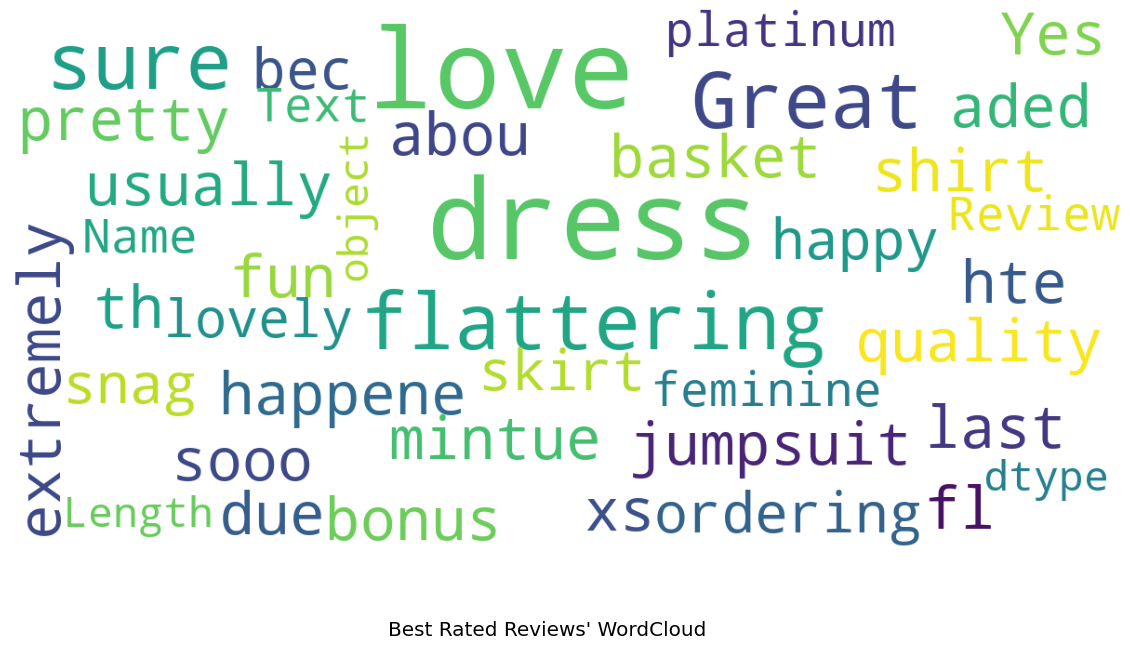

In [67]:
# print best rating reviews' wordcloud
show_wordcloud(best_reviews['Review Text'], "Best Rated Reviews' WordCloud")

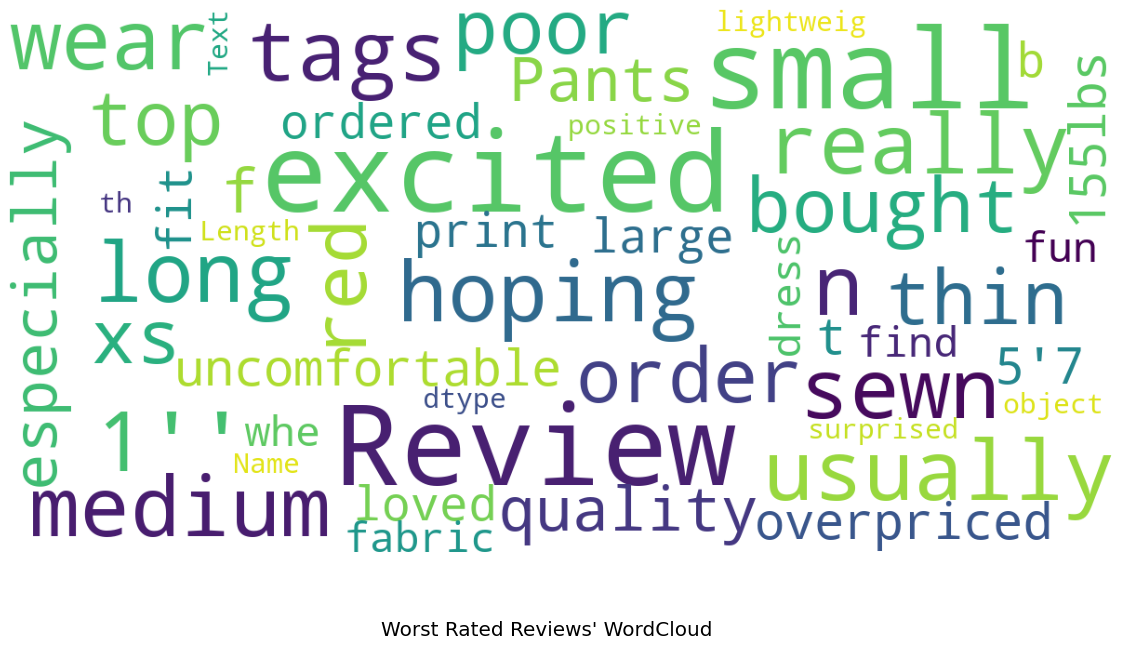

In [68]:
# print worst rating reviews' wordcloud
show_wordcloud(worst_reviews['Review Text'], "Worst Rated Reviews' WordCloud")

### Section's Insights:
> The best-rated reviews contain many positive words, whereas the worst-rated reviews contain many negative words.

## Customers’ Age Range Analysis

> This section contains the analysis of the most customers’ age range of the E-commerce and how are their reviews by analyzing the 'Age', 'Recommended IND', 'Rating', and 'Positive Feedback Count' columns.

### Age Count

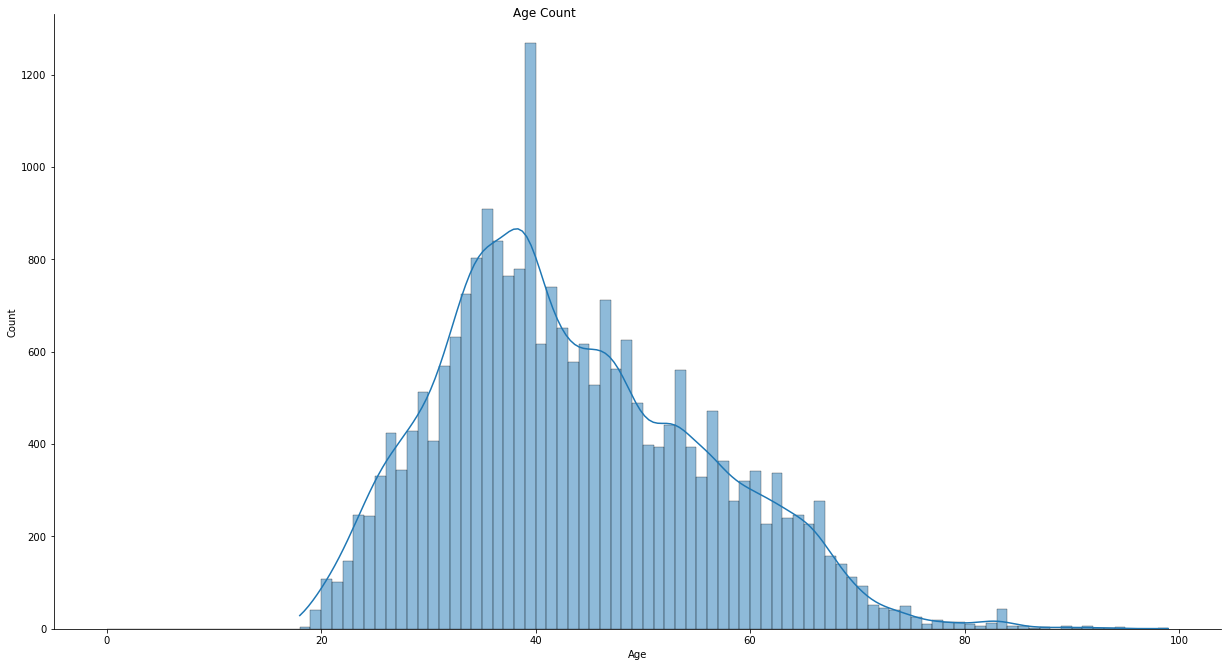

In [57]:
# Plot the Age on a histogram
bin_edges = np.arange(0, df.Age.max()+1, 1)
age_plt = sb.displot(df.Age, bins = bin_edges, kde=True);
age_plt.fig.set_figwidth(20)
age_plt.fig.set_figheight(10)
age_plt.fig.suptitle('Age Count');

#### Observation:
> The Age feature is slightly right-skewed, but it is expected since most people who use e-commerce are young.

### Customer's Age and Recommended Product

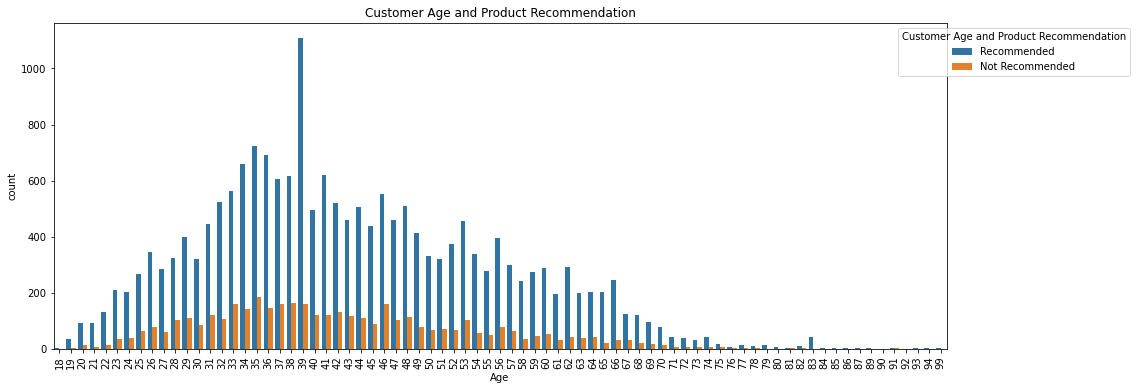

In [58]:
# Change the plot size to make it clear
plt.figure(figsize=(16, 6))

# Change the Recommended IND column to have a meaningful values
df_recommended = df.copy()
df_recommended['Recommended IND'] = df_recommended['Recommended IND'].replace({1: "Recommended", 0: "Not Recommended"})

# Plot the bar chart
age_rec_plt = sb.countplot(data = df_recommended, x = 'Age', hue = 'Recommended IND');

# Change the x-axis labels rotation to make them readable
age_rec_plt.set_xticklabels(age_rec_plt.get_xticklabels(),rotation = 90);

# Set the plot title
age_rec_plt.set_title('Customer Age and Product Recommendation');

# Set the legend title and location
age_rec_plt.legend(title='Customer Age and Product Recommendation', bbox_to_anchor= (0.94, 1));


#### Observation:
> Customers who are in age 39 are most likely to recommend a product.

### Age, Positive Feedback Count, and Rating

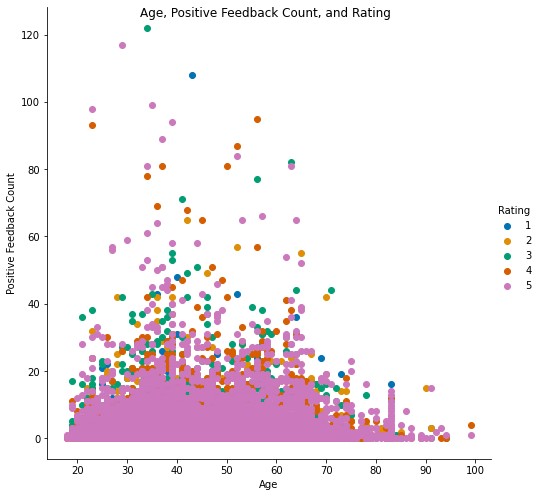

In [59]:
g = sb.FacetGrid(data = df, hue = 'Rating', height = 7,
                 palette = 'colorblind')
g.map(plt.scatter, 'Age', 'Positive Feedback Count')
g.add_legend();

# Set Title
g.fig.suptitle('Age, Positive Feedback Count, and Rating');

#### Observations:
> Customers found that the reviews that written by customers in their mid-30s were positive.

### Section's Insights:
> 1. The age range of the e-commerce's customers are adults.
> 2. Customers who are in age 39 are most likely to recommend a product.
> 3. Customers found that the reviews that written by customers in their mid-30s were positive.

## Positive Feedback Count Analysis

> This section contains the analysis of how helpful the reviews are for the other customers by analyzing the 'Rating', 'Review Text', and 'Positive Feedback Count' columns.

### Positive Feedback Count and Rating

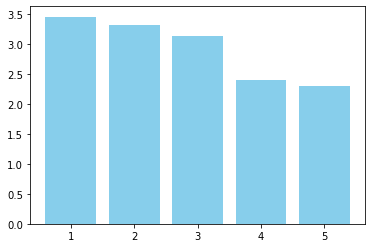

In [60]:
asc_rating_feedback_count = []

for rating in sorted(df['Rating'].unique()):
    temp_df = df.loc[df['Rating'] == rating]
    asc_rating_feedback_count.append(temp_df['Positive Feedback Count'].mean())

# plt.figure(figsize=(16, 20))
plt.bar(sorted(df['Rating'].unique()), asc_rating_feedback_count, color='skyblue');

#### Observations:
> It is most likely that other customers find that low-rating reviews are positive.

### Rating Count of No Text Review

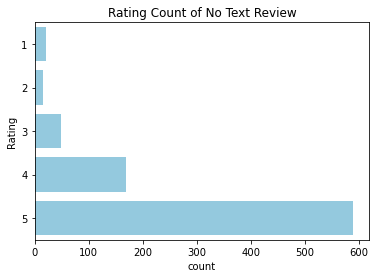

In [61]:
no_text_df = df.loc[df['Review Text'] == 'NO TEXT']

# Plot the Rating on a Horizontal bar chart

# The `color_palette()` returns the the current / default palette as a list of RGB tuples. 
# Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. 
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]
rating_plt = sb.countplot(data = no_text_df, y = 'Rating', color='skyblue');
rating_plt.set_title('Rating Count of No Text Review');

#### Observation:
> Reviews with no text tend to have high rating.

### Positive Feedback Count of No Text Reviews

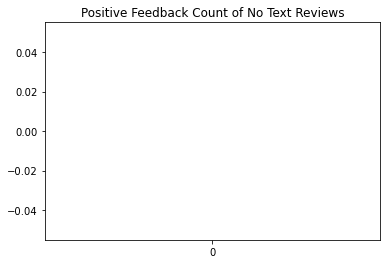

In [69]:
# Plot the Positive Feedback Count on a histogram
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2
    
# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(no_text_df['Positive Feedback Count'].max())+1, 1)

# Plot the scaled data
plt.hist(no_text_df['Positive Feedback Count'].apply(sqrt_trans), bins = bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(no_text_df['Positive Feedback Count'].max())+10, 10)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));
plt.title('Positive Feedback Count of No Text Reviews');

In [ ]:
print('The Positive Feedback Count of the No Text Reviews') 
no_text_df['Positive Feedback Count'].value_counts()

#### Observation:
> Customers don't find reviews with no text helpful.

### Section's Insights:
> 1. Customers find the low rated reviews more helpful than the high rated ones. 
> 2. Reviews with no text tend to have high rating; however, customers don't find these reviews helpful.

## Conclusion
> After analyzing the Women's Clothing E-Commerce Reviews dataset and answering our questions, we can conclude that customer reviews benefit both the customers and the business. The business can understand its customers better, make the customers market for them in the reviews and ratings, and increase customers' trust by reading others' reviews of the product they want to purchase. Finally, the reviews give the customers have voice and power!

If you're interested in this analysis blog, you can visit it from [here](https://medium.com/@lamaazizd/womens-e-commerce-clothing-reviews-930be95c3996).